In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [3]:
train=pd.read_csv("train.csv")

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# VISUAL EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Survived', ylabel='count'>

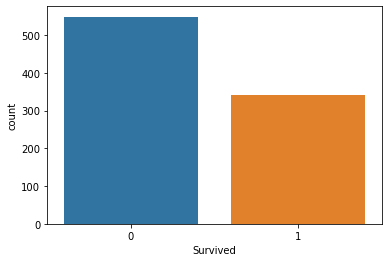

In [7]:
sns.countplot(x="Survived",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

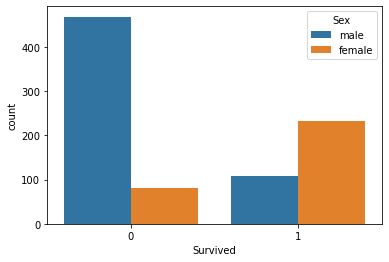

In [8]:
sns.countplot(x="Survived",hue="Sex",data=train)

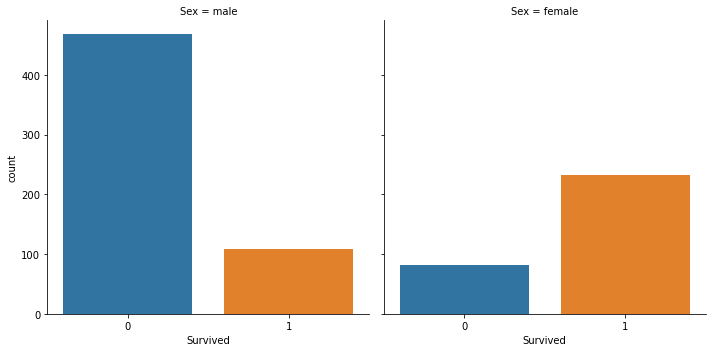

In [9]:
sns.catplot(x="Survived",col="Sex",kind='count',data=train)

###  *female is more survived than male*

In [10]:
train.groupby(["Sex"]).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [11]:
train.groupby(["Sex"]).Survived.count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [12]:
#see the difference of sum and count for better understanding 
train.groupby(["Sex"]).Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [13]:
print(train[train.Sex=="female"].Survived.sum()/train[train.Sex=="female"].Survived.count())
print(train[train.Sex=="male"].Survived.sum()/train[train.Sex=="male"].Survived.count())

0.7420382165605095
0.18890814558058924


### *74% female are survived and 19% male are survived*

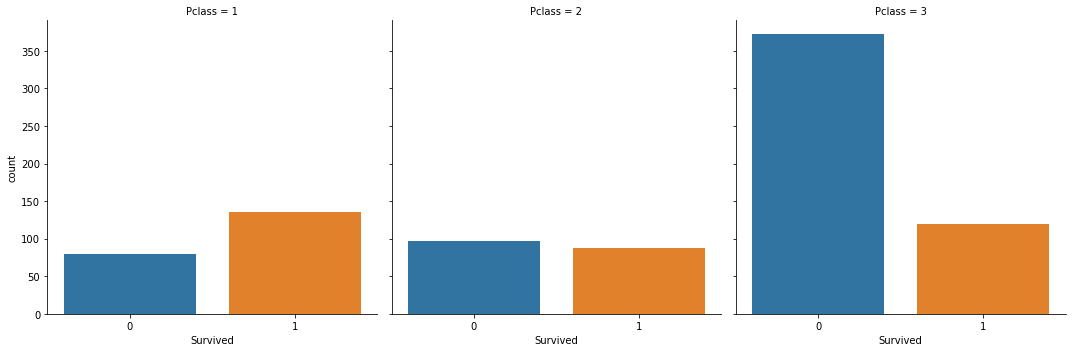

In [14]:
sns.catplot(x="Survived",col="Pclass",kind='count',data=train)

### Passengers that travelled in first class were more likely to survive. 
### On the other hand, passengers travelling in third class were more unlikely to survive.

C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\rasa\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


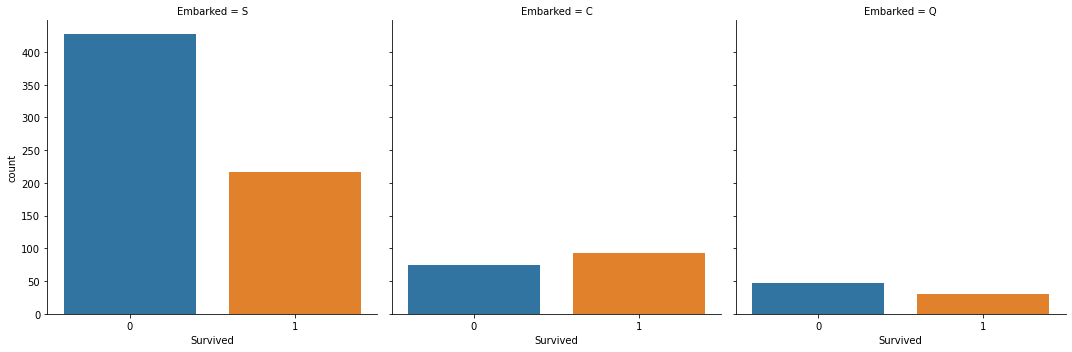

In [15]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=train)

C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\rasa\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

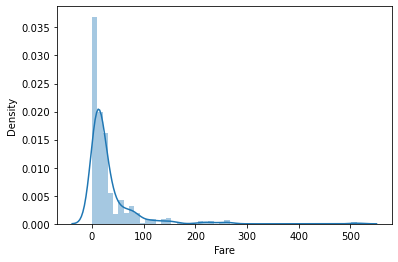

In [16]:
sns.distplot(train["Fare"])

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

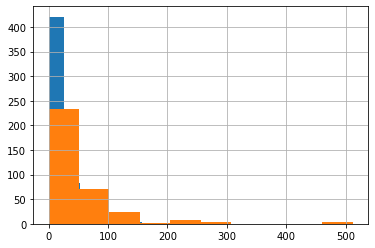

In [17]:
train.groupby("Survived").Fare.hist()

### It looks as though those that paid more had a higher chance of surviving.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

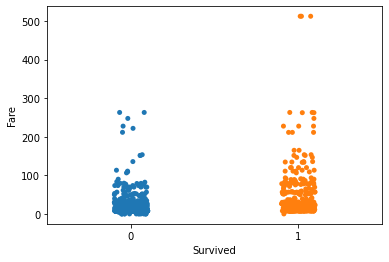

In [18]:
sns.stripplot(x="Survived",y="Fare",data=train)

C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\rasa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\rasa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

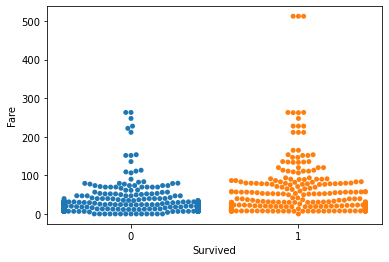

In [19]:
sns.swarmplot(x="Survived",y="Fare",data=train)

C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\rasa\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

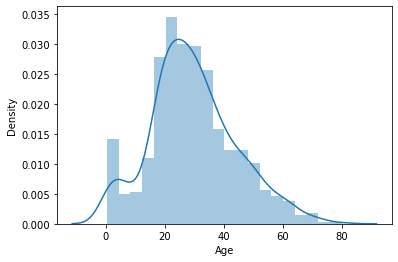

In [20]:
sns.distplot(train["Age"])

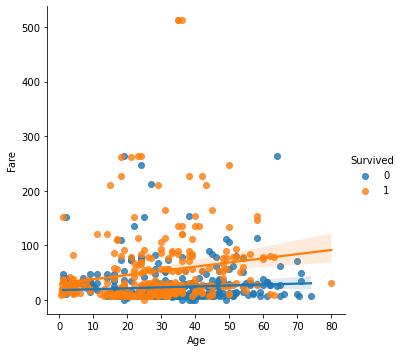

In [21]:
sns.lmplot(x="Age",y="Fare",hue="Survived",data=train)

### It looks like those who survived either paid quite a bit for their ticket or they were young.

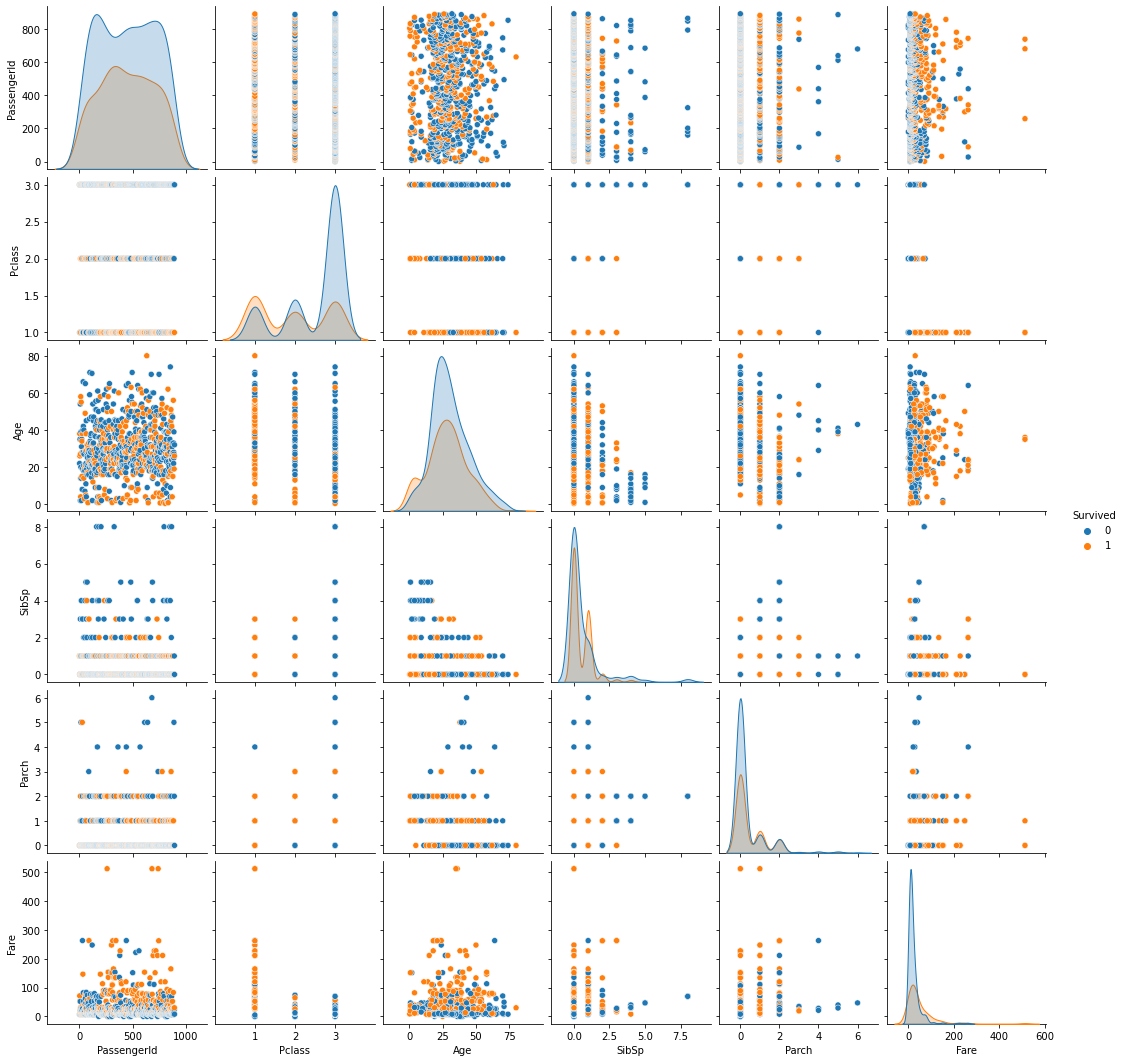

In [22]:
sns.pairplot(train, hue='Survived');

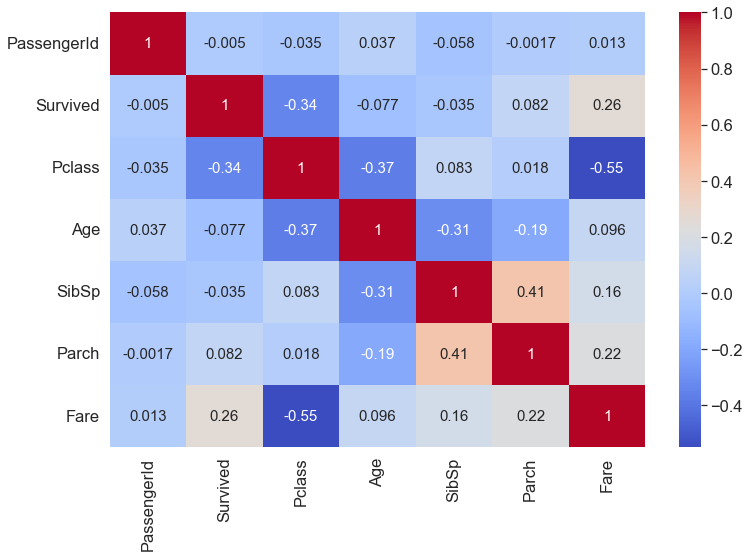

In [23]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, annot_kws={'size':15})
plt.show()

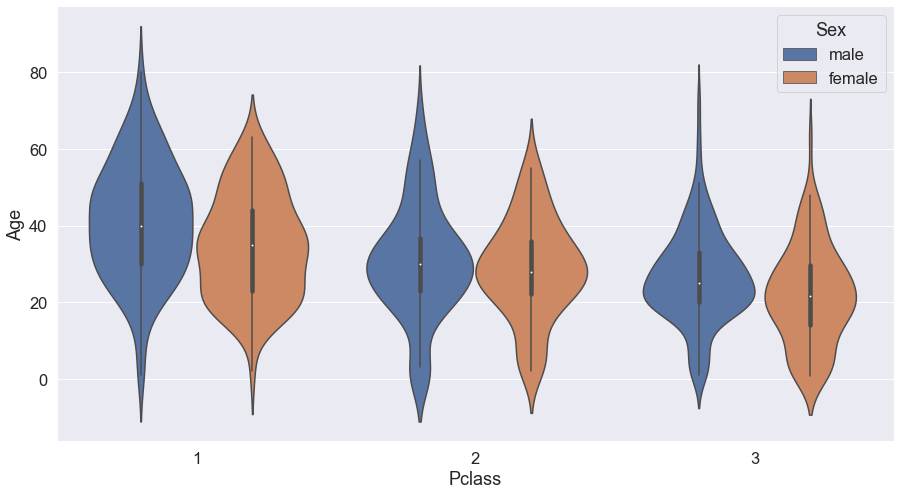

In [24]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=train, x='Pclass', hue='Sex', y='Age', inner='box')
plt.show()